# **Labor del Péndulo**

por: Juan Manuel Calvo Duque - Lina Marcela García Palacio

## **Planteamiento del Problema:** 
La labor propuesta consiste en desarrollar un estudio exhaustivo del comportamiento de un péndulo no lineal bajo dos condiciones de oscilación: Pequeños y grandes ángulos. El análisis abarca la modelación matemática del sistema, la realización de simulaciones numéricas para resolver las ecuaciones de movimiento no lineales y la comparativa de estos resultados con datos experimentales reales. Ajustar el parámetro de la frecuencia natural del péndulo es el objetivo, con base en los resultados obtenidos, para validar la precisión del modelo teórico frente a la complejidad del fenómeno físico observado. Esta labor resaltar la importancia de combinar métodos analíticos y numéricos con experimentación directa, que permite una comprensión más profunda de los sistemas dinámicos no lineales.

## **Procedimiento:** 
En este estudio, se investigó el comportamiento de un péndulo bajo dos condiciones de oscilación: Ángulos iniciales menores y mayores a 10 grados. Para iniciar, se construyó el péndulo utilizando materiales simples, como madera para el soporte, una cuerda resistente y una masa colgante. Luego, se capturaron un total de 12 videos para registrar el movimiento oscilatorio del péndulo en diversas condiciones, distribuidos por igual entre oscilaciones con ángulos inferiores y superiores a 10 grados.

Despues, se llevó a cabo un análisis minucioso de estos movimientos utilizando el software Kinovea, que posibilitó la medición precisa de los ángulos de oscilación del péndulo en relación con el tiempo. Se exportaron los datos recolectados de los ángulos en formato CSV para ser analizados posteriormente.

Posteriormente, se calculó la frecuencia angular natural (ωn) del sistema a partir de los datos correspondientes a oscilaciones con un ángulo inferior a 10 grados mediante un ajuste de regresión. Este proceso involucró la comparación de los datos experimentales con el modelo generado por la regresión para validar la precisión del ajuste.

Después, los datos de oscilaciones con ángulos iniciales mayores a 10 grados fueron analizados mediante el modelo de regresión obtenido. Se abordó el problema desde una perspectiva no lineal debido a la discrepancia entre las predicciones del modelo y los datos experimentales para ángulos mayores.

Finalmente, se exploraron dos métodos numéricos para encontrar la solución de la ecuación diferencial (modelo no lineal) que describe el movimeinto del pendulo, como parte de superar este desafío. Los resultados obtenidos a través de estos métodos numéricos demostraron un mejor ajuste a los datos experimentales, lo cual valida la importancia de tener en cuenta la no linealidad del sistema para ángulos de oscilación más grandes.

## **Solución**

Inicialmente, se importan las librerías necesarias para el desarrollo de la actividad: Numpy, scipy, matplotlib y pandas

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt 
import pandas as pd

## Datos para $ \theta_0 < 10°$

Se lee el archivo en formato .csv de los datos experimentales para un ángulo menor a 10 grados. En este caso, se especifica el delimitador y el separador decimal.

In [2]:
df = pd.read_csv('Data_T010.csv', delimiter=';', decimal=',')

Ya que se importan los datos mediante un dataframe, se separan las columnas y se convierten a arreglos en Numpy 

In [3]:
tiempo = df['Tiempo (ms)'].to_numpy()
angulos = df['Ángulo 1'].to_numpy()

Se define una función, a la cual se le asocia el modelo:
$$ \theta = \theta_{max} sin(w_n*t+\phi) $$

In [4]:
def modelo_pendulo(t, theta_m, omega_n, phi):
    return theta_m * np.sin(np.radians(np.degrees(omega_n)*(t/1000)+phi))

Se utiliza la función **curve_fit** de scipy para encontrar los parámetros óptimos $ \theta_{max},  w_n$ y  $ \phi $ que mejor ajustan la función **modelo_pendulo** a los datos experimentales tomados. 

In [5]:
# Ajuste de regresión no lineal
T = 0.8
popt, pcov = curve_fit(modelo_pendulo, np.linspace(0,800, len(df['Tiempo (ms)'])), angulos, p0=[max(angulos), 2 * np.pi / T, 0])

Se obtienen los valores óptimos para los tres parámetros mencionados anteriormente, y se muestra, en particular, el parámetro de interés ($w_n$)

In [6]:
theta_m_opt, omega_n_opt, phi_opt = popt
print(f"Frecuencia angular natural ajustada: {omega_n_opt} deg/s")

Frecuencia angular natural ajustada: 7.530236946106024 deg/s


Se hace una gráfica que contiene los valores experimentales y la curva generada por el modelo ajustado.

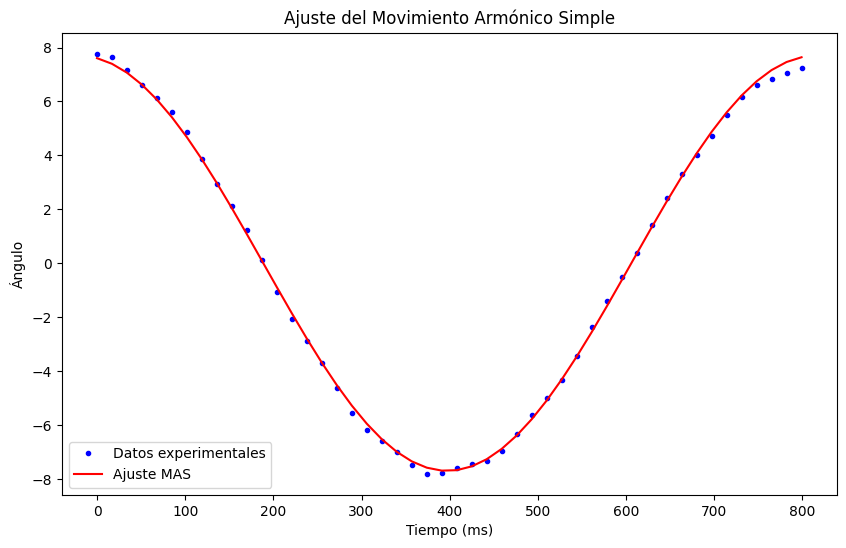

In [7]:
# Graficar los datos y el ajuste
plt.figure(figsize=(10, 6))
plt.plot(tiempo, angulos, 'b.', label='Datos experimentales')
plt.plot(tiempo, modelo_pendulo(tiempo, *popt), 'r-', label='Ajuste MAS')
plt.title('Ajuste del Movimiento Armónico Simple')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Ángulo')
plt.legend()
plt.show()

## Datos para $ \theta_0 > 10°$

Se lee el archivo en formato .csv de los datos experimentales para un ángulo mayor a 10 grados. En este caso, se especifica el delimitador y el separador decimal.

In [8]:
df_g = pd.read_csv('Data_T040.csv', delimiter=';', decimal=',')

Ya que se importan los datos mediante un dataframe, se separan las columnas y se convierten a arreglos en Numpy

In [9]:
tiempo_g = df_g['Tiempo (ms)'].to_numpy()
angulos_g = df_g['Ángulo 1'].to_numpy()

Se hace una gráfica que contiene los valores experimentales y la curva generada por el modelo ajustado.

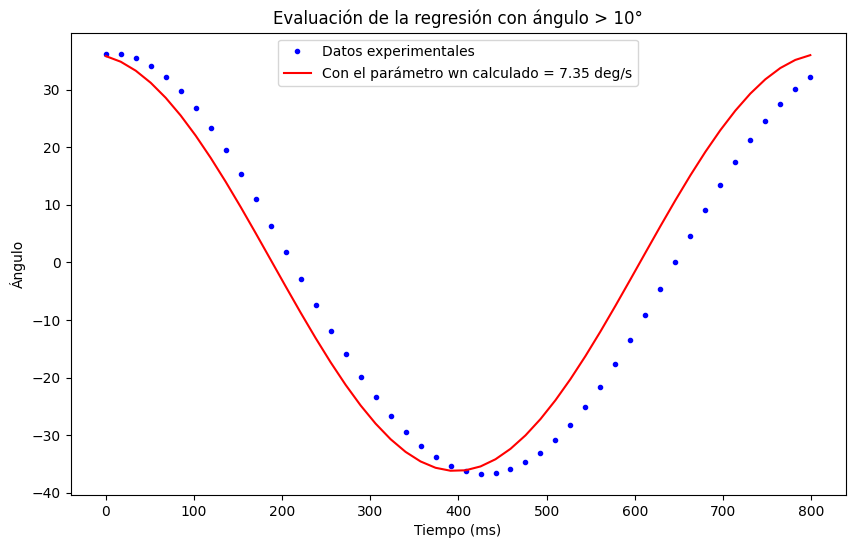

In [10]:
# Graficar los datos y el ajuste
plt.figure(figsize=(10, 6))
plt.plot(tiempo_g, angulos_g, 'b.', label='Datos experimentales')
plt.plot(tiempo_g, modelo_pendulo(tiempo_g, max(angulos_g), omega_n_opt, phi_opt), 'r-', label='Con el parámetro wn calculado = 7.35 deg/s')
plt.title('Evaluación de la regresión con ángulo > 10°')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Ángulo')
plt.legend()
plt.show()

### Ajuste mediante Método numérico 
\
Para ajustar el modelo del pendulo para un ángulo inicial mayor a 10 grados, se desarrolla un método numérico, para solucionar le ecuación diferencial del modelo no lineal:

$$ \ddot{\theta} = -\frac{g}{L} sin(\theta) $$ 

Uitilizando como valor inicial $36.2149°$ y el factor $\omega_n$ calculado en la regresión del primer paso.

Este análisis se realiza mediante dos métodos de sicpy llamados *solve_ivp* y *odeint*, para cada uno de ellos se definen las condiciones iniciales y una función para resolver la ecuación diferencial anterior. 

Se importan los dos métodos para resolver la ecuacuión diferencial:

In [11]:
from scipy.integrate import solve_ivp
from scipy.integrate import odeint

Se definen las condiciones iniciales para la solución mediante *solve_ivp*

In [12]:
#constantes:
theta_0_deg = 36.2149 
theta_0 = np.deg2rad(theta_0_deg)
omega_0 = 0

Se define el espacio de evaluación como vector de tiempo, con las mismas características que el vector de tiempo de los datos experimentales

In [13]:
#Tiempos
t_evaluation = np.linspace(0, 0.8, 100)

Se define la ecuación diferencial, utilizando el factor $\omega_n$ calculado, en lugar de calcular $\frac{g}{L}$ con la longitud de la cuerda del experimento.

In [14]:
#Función para el método numérico
def metodo_num_pendulo(t, y):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = -((omega_n_opt)**2)*np.sin(theta)
    return [dtheta_dt, domega_dt]

#### Solución mediante **solve_ivp** 
*solve_ivp* es un solucionador de problemas de valor inicial para sistemas de ecuaciones diferenciales ordinarias (EDOs). Este puede utilizar diferentes métodos numéricos para resolver EDOs, dependiendo de los argumentos específicos que se le pasen. Este, selecciona automáticamente el método numérico más adecuado basándose en el tipo de problema. Los métodos disponibles incluyen 'RK45' (Runge-Kutta de orden 4(5)), 'RK23', 'DOP853', 'Radau', 'BDF' y 'LSODA', cada uno con sus propias características y adecuado para diferentes tipos de problemas.

Se calcula la solución de la ecuación deferencial y se convierte a grados, ya que esta función *solve_ivp* arroja la solución en radianes.

In [15]:
#Solución del método numérico
solucion = solve_ivp(metodo_num_pendulo, (0, 0.8), [theta_0, omega_0], t_eval=t_evaluation)
solucion_deg = np.rad2deg(solucion.y[0])



Se realiza una gráfica que contiene los resultados de la regresión lineal con el ángulo inicial grande, la solución de la ecuación diferencial mediante el método numérico y los datos experimentales.

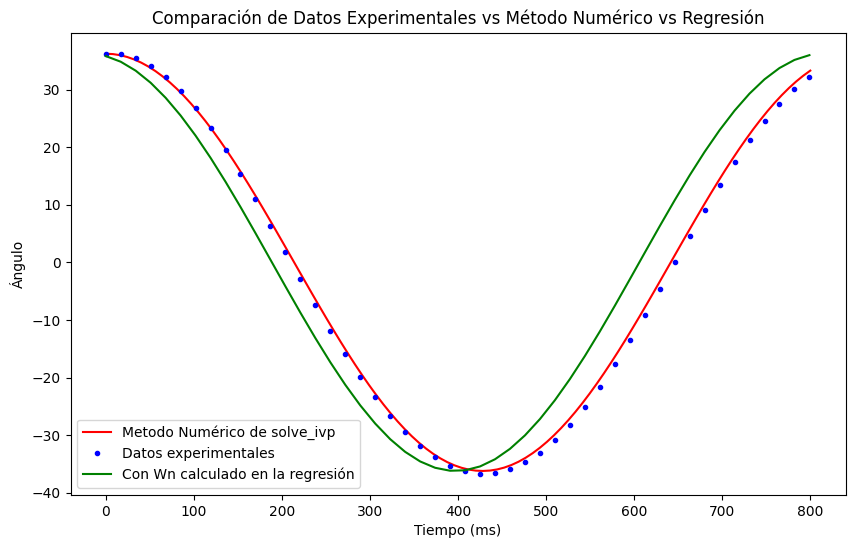

In [16]:
# Graficar los datos y el ajuste
plt.figure(figsize=(10, 6))
plt.plot(solucion.t*1000, solucion_deg, 'r', label='Metodo Numérico de solve_ivp')
plt.plot(tiempo_g, angulos_g, 'b.',label='Datos experimentales')
plt.plot(tiempo_g, modelo_pendulo(tiempo_g, max(angulos_g), omega_n_opt, phi_opt), 'g-', label='Con Wn calculado en la regresión')
plt.title('Comparación de Datos Experimentales vs Método Numérico vs Regresión')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Ángulo')
plt.legend()
plt.show()

#### Solución mediante **odeint**

*odeint* utiliza el solucionador LSODA del paquete FORTRAN ODEPACK para resolver ecuaciones diferenciales ordinarias. LSODA es capaz de manejar tanto problemas rígidos como no rígidos, y su principal característica es que puede cambiar automáticamente entre métodos numéricos stiff (rígidos) y non-stiff (no rígidos) en función de la naturaleza del problema a resolver.

Se definen los valores iniciales para la solución mediante **odeint**

In [17]:
#constantes:
theta_0_deg = 36.2149 
theta_0 = np.deg2rad(theta_0_deg)
omega_0 = 0

In [18]:
t_span = np.linspace(0, 0.8, 100)

Se define la ecuación para solucionar mediante **odeint**

In [19]:
#Función para el método numérico
def metodo_num_pendulo(y, t):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = -((omega_n_opt)**2)*np.sin(theta)
    return [dtheta_dt, domega_dt]

Se soluciona la ecuación diferencial mediante el método **odeint**

In [20]:
y0 = [theta_0, omega_0]
solucion_odeint = odeint(metodo_num_pendulo, y0, t_span)

Se convierte la solución calculada mediante **odeint** a grados, ya que este método la calcula en radianes.

In [21]:
solucion_odeint_grad = np.rad2deg(solucion_odeint[:, 0])

Se realiza una gráfica que contiene los resultados de la regresión lineal con el ángulo inicial grande, la solución de la ecuación diferencial mediante el método numérico y los datos experimentales.

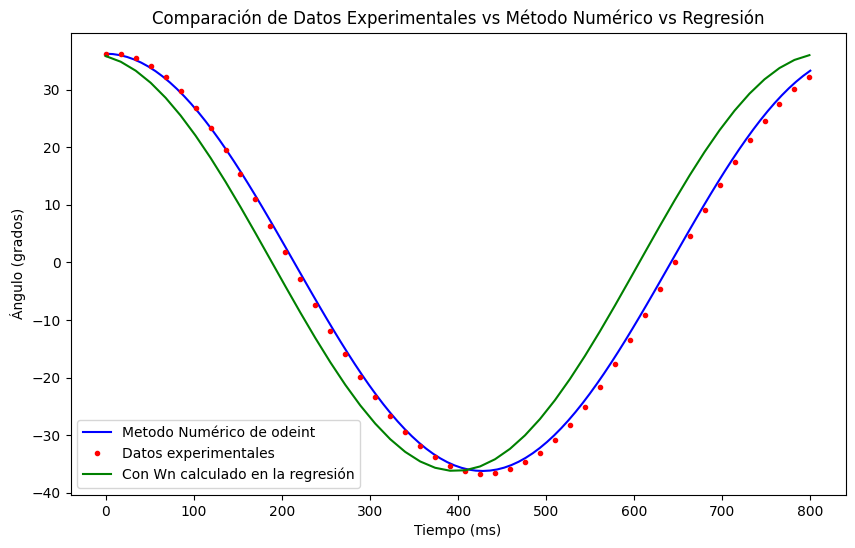

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(t_span*1000, solucion_odeint_grad, 'b-', label='Metodo Numérico de odeint')  # Convertir tiempo a milisegundos
plt.plot(tiempo_g, angulos_g, 'r.', label='Datos experimentales')
plt.plot(tiempo_g, modelo_pendulo(tiempo_g, max(angulos_g), omega_n_opt, phi_opt), 'g-', label='Con Wn calculado en la regresión')
plt.title('Comparación de Datos Experimentales vs Método Numérico vs Regresión')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Ángulo (grados)')
plt.legend()
plt.show()

Finalmente, se realiza una gráfica para comparar las soluciones mediante los dos métodos numéricos, la regresión calculada y los valores experimentales.

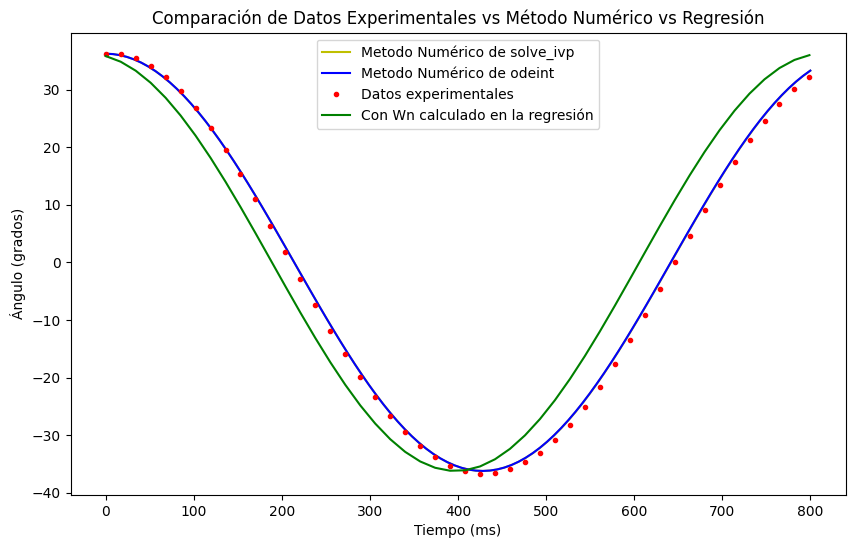

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(solucion.t*1000, solucion_odeint_grad, 'y', label='Metodo Numérico de solve_ivp')
plt.plot(t_span*1000, solucion_deg, 'b-', label='Metodo Numérico de odeint')  # Convertir tiempo a milisegundos
plt.plot(tiempo_g, angulos_g, 'r.', label='Datos experimentales')
plt.plot(tiempo_g, modelo_pendulo(tiempo_g, max(angulos_g), omega_n_opt, phi_opt), 'g-', label='Con Wn calculado en la regresión')
plt.title('Comparación de Datos Experimentales vs Método Numérico vs Regresión')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Ángulo (grados)')
plt.legend()
plt.show()

## **Resultados**

En el desarrollo de esta labor, se creó un modelo de regresión lineal para explicar cómo oscila un péndulo en la situación donde los ángulos son pequeños. Bajo esas condiciones, los datos experimentales recopilados lograron un ajuste significativo con la generación de una gráfica teórica que refleja con gran precisión la oscilación del péndulo gracias a la aplicación de este modelo. El ajuste demuestra que el modelo lineal es válido para describir el movimiento del péndulo en pequeñas oscilaciones, con efectivas simplificaciones teóricas.

Sin embargo, al aplicar el modelo de regresión lineal para describir oscilaciones con ángulos iniciales grandes, se notó una diferencia significativa. Al compararla con los datos experimentales de ángulos grandes, la gráfica resultante mostró diferencias significativas en el periodo de oscilación. Las limitaciones del modelo lineal para capturar la dinámica compleja del péndulo en condiciones de oscilaciones amplias se resaltan con esta discrepancia, donde los efectos no lineales adquieren predominancia.